In [1]:
from create_data import DumbCirc as dc
from augsuq import AugmentedSUQ as auq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 2, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
model_zero = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp, mapping_dim=2, negative_cloud=fnc)

In [5]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model_zero.set_device(device)

In [6]:
model_zero.train(num_epochs=2, batch_size=20, learning_rate=0.0001)

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\augsuq.py:182: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean_pos.T @ torch.linalg.inv(posterior_var_pos) @ posterior_mean_pos


Epoch:0, Loss: -0.005523716134484857
Epoch:1, Loss: 0.005547515016514808
Epoch:2, Loss: 0.01704409683914855
Epoch:3, Loss: 0.014377889181848149
Epoch:4, Loss: 0.0008147531804419122
Epoch:5, Loss: -0.004994573047649581
Epoch:6, Loss: 0.00825914162457278
Epoch:7, Loss: -0.04298160153345333
Epoch:8, Loss: 0.003350022276123729
Epoch:9, Loss: -0.016608105460562607


In [7]:
model_zero.set_test_data(tc, lt)

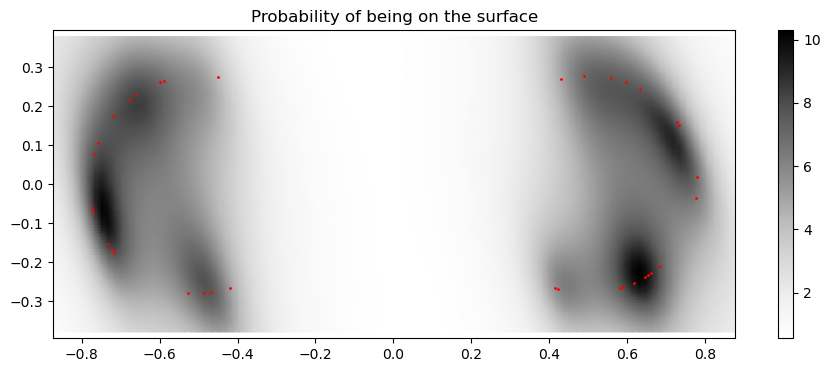

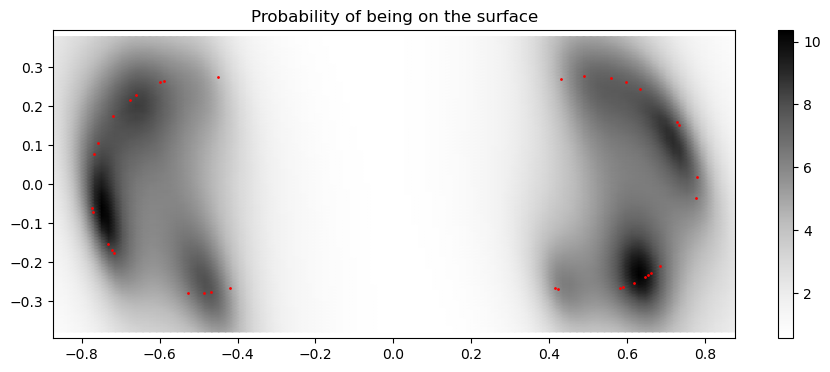

In [8]:
model_zero.predict()

In [9]:
model_zero.set_test_data(pc[2:4, :], lp[2:4, :])

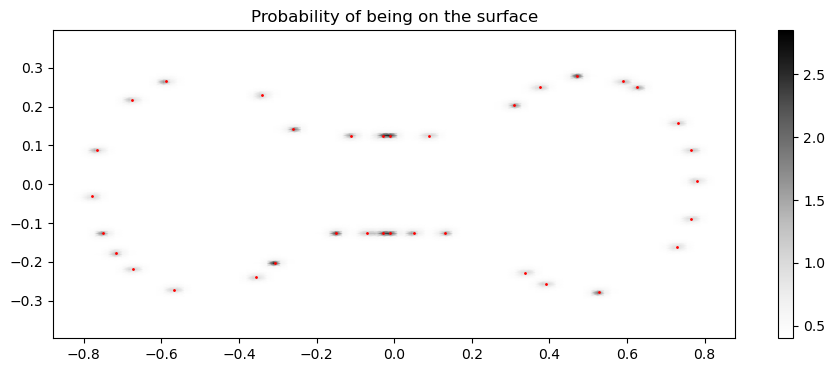

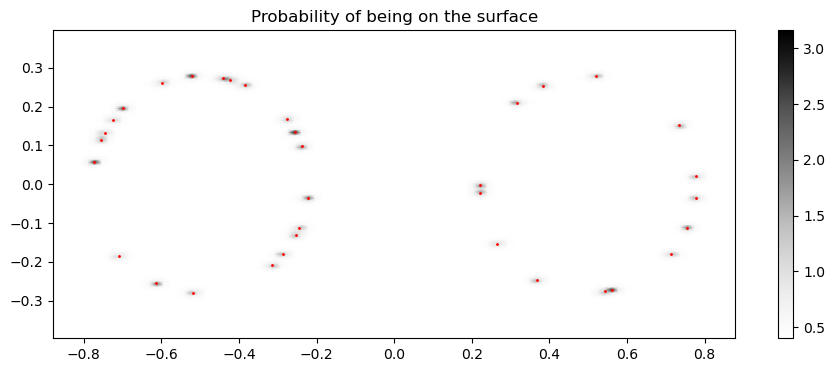

In [10]:
model_zero.predict()

In [4]:
model_bin = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp, negative_cloud=fnc)

In [5]:
device = "cpu"
model_bin.set_device(device)

In [6]:
model_bin.train(num_epochs=10, batch_size=20, learning_rate=0.0001, kind='b')

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\augsuq.py:227: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean_pos.T @ torch.linalg.inv(posterior_var_pos) @ posterior_mean_pos


Epoch:0, Loss: 51.19359283447265
Epoch:1, Loss: 60.50655380249024
Epoch:2, Loss: 60.86497729492187
Epoch:3, Loss: 60.300539862060546
Epoch:4, Loss: 59.09330880859375
Epoch:5, Loss: 58.04820277734375
Epoch:6, Loss: 55.46496129521485
Epoch:7, Loss: 54.145577860849606
Epoch:8, Loss: 53.28691662807812
Epoch:9, Loss: 51.96593053630899


In [7]:
model_bin.set_test_data(tc, lt)

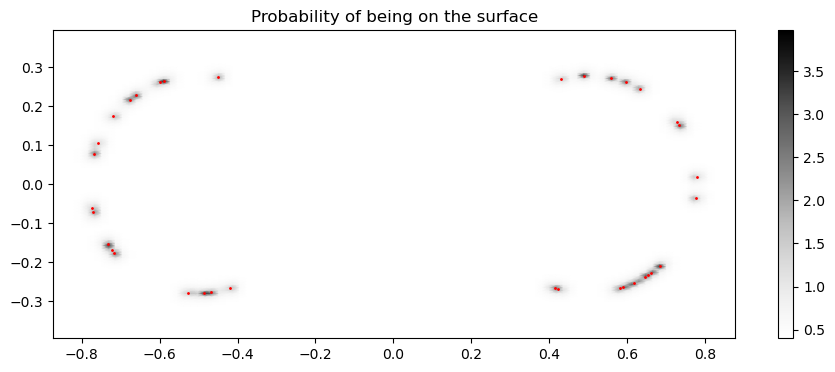

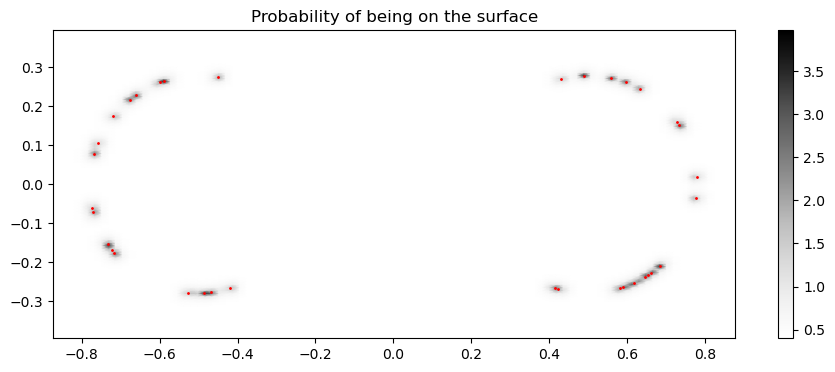

In [8]:
model_bin.predict()

In [9]:
model_bin.set_test_data(pc[2:4, :], lp[2:4, :])

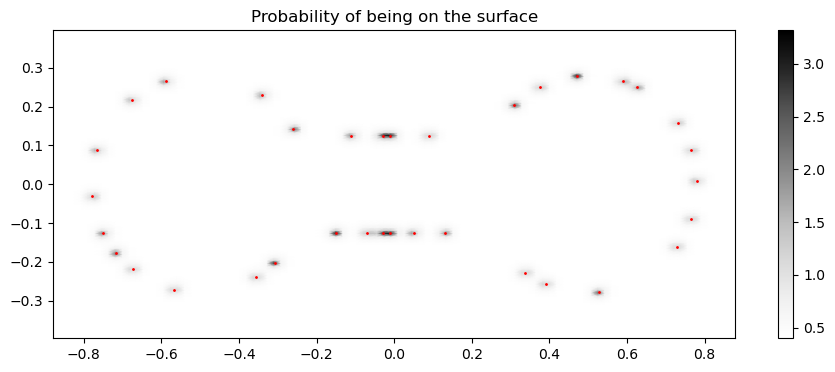

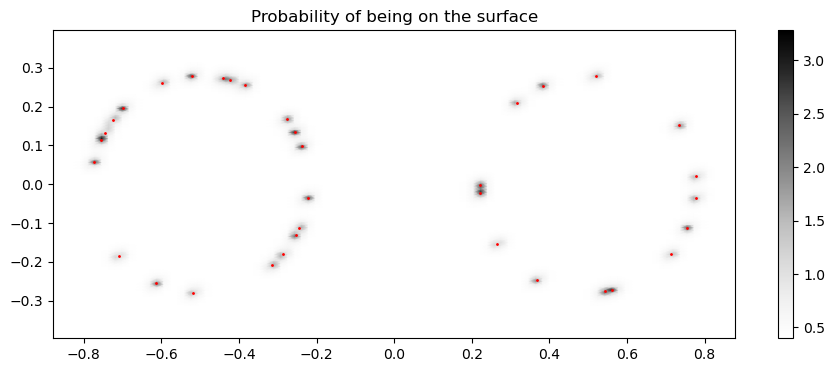

In [10]:
model_bin.predict()